<a href="https://colab.research.google.com/github/challaharijoshika/PRODIGY_ML_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_excel('/content/train.xlsx')
test_data = pd.read_excel('/content/test.xlsx')
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [ ]:
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']

In [ ]:
X_train = train_data[features].values
y_train = train_data['SalePrice'].values
X_test = test_data[features].values

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train_split, y_train_split)

In [ ]:
model_slope = model.coef_
model_intercept = model.intercept_
print('Slope:', model_slope)
print('Intercept:', model_intercept)
y_val_pred = model.predict(X_val_split)

Slope: [   101.73256593 -26704.0146758   30848.02847147   4611.65326359]
Intercept: 52830.652788360865


In [ ]:
mae = mean_absolute_error(y_val_split, y_val_pred)
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)
print(f"Validation Mean Absolute Error is: {mae}")
print(f"Validation Mean Squared Error is: {mse}")
print(f"Validation R-squared is: {r2}")

Validation Mean Absolute Error is: 36018.563138363446
Validation Mean Squared Error is: 2810942965.2180653
Validation R-squared is: 0.6335301929422245


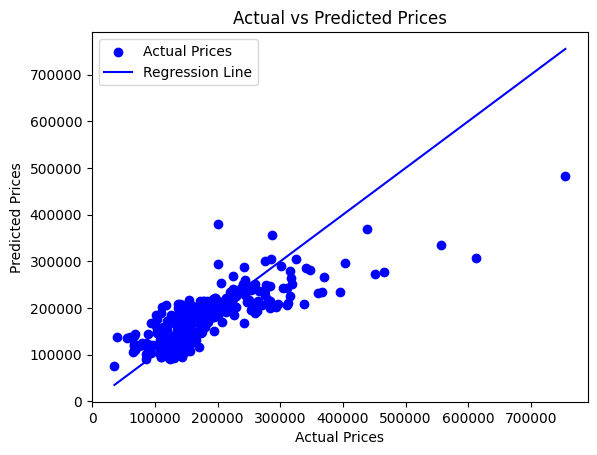

In [ ]:
plt.scatter(y_val_split, y_val_pred, color='blue', label='Actual Prices')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='blue', label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()